# **Práctica 1: Reglas de Asociación**

> Nombre: **Martinez Reyes Javier**


> Email: lds.xavi@gmail.com















---




**Objetivo**

*Obtener reglas de asociación a partir de datos obtenidos de una plataforma de películas, donde los clientes pueden rentar o comprar este tipo de contenidos.

**Características**

Por lo general, existe un patrón en lo que ven los clientes. Por ejemplo, superhéroes en la categoría para niños.
En este sentido, se pueden generar más ganancias, si se puede identificar la relación entre las películas. Esto es, si las películas A y B se rentan juntas, este patrón se puede aprovechar para aumentar las ganancias.
Las personas que rentan una de estas películas pueden ser empujadas a rentar o comprar la otra, a través de campañas o sugerencias dentro de la plataforma.
En este sentido, cada vez es común familiarizarse con los motores de recomendación en Netflix, Amazon, por nombrar los más destacados.

> ### **1) Instalar e importar las bibliotecas**



In [5]:
# pip es un administrador de paquetes de Python. Se instala el paquete Apyori
!pip install apyori  

In [3]:
import pandas as pd                 # Para la manipulación y análisis de los datos
import numpy as np                  # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt     # Para la generación de gráficas a partir de los datos
from apyori import apriori   



> ### **2) Importar los datos**



In [50]:
#En caso que se esté usando en GoogleColaboratory
#from google.colab import files
#files.upload()

In [51]:
DatosMovies = pd.read_csv('movies.csv')

In [7]:
DatosMovies


,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
0,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mad Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observaciones:**

1) Se observa que el encabezado es la primera transacción.

2) NaN indica que esa película no fue rentada o comprada en esa transacción.

In [52]:
#Se indica que el DF no tiene encabezado, así no tomara la primera transacción como header
DatosMovies = pd.read_csv('movies.csv', header=None)
#Se observan las primeras 6 transacciones, iniciando en 0
DatosMovies.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
1,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mad Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




> ## **3) Exploración de los items para contabilizarlos y mostrar la frecuencia**



In [53]:
##Se incluyen todas las transacciones en una sola lista
transacciones = DatosMovies.values.reshape(-1).tolist() #-1 es hasta la ultima
transacciones

['The Revenant',
 '13 Hours',
 'Allied',
 'Zootopia',
 'Jigsaw',
 'Achorman',
 'Grinch',
 'Fast and Furious',
 'Ghostbusters',
 'Wolverine',
 'Mad Max',
 'John Wick',
 'La La Land',
 'The Good Dunosaur',
 'Ninja Turtles',
 'The Good Dunosaur Bad Moms',
 '2 Guns',
 'Inside Out',
 'Valerian',
 'Spiderman 3',
 'Beirut',
 'Martian',
 'Get Out',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Deadpool',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'X-Men',
 'Allied',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ninja Turtles',
 'Moana',
 'Ghost in the Shell',
 'Ralph Breaks the Internet',
 'John Wick',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Mad Max',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


In [54]:
#Se crea una matriz (dataframe) usando la lista y se incluye una columna 'Frecuencia'
Lista = pd.DataFrame(transacciones)
Lista['Frecuencia'] = 1 #Se crea la Columna Frecuencia en la segunda columna
Lista

,0,Frecuencia
0,The Revenant,1
1,13 Hours,1
2,Allied,1
3,Zootopia,1
4,Jigsaw,1
...,...,...
149195,NaN,1
149196,NaN,1
149197,NaN,1
149198,NaN,1


In [55]:
#Se agrupa los elementos
Lista = Lista.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True)
#.groupby(inicia en cero, escribe el indice de la columna (se renombra a item), funcion que cuent

Lista['Porcentaje'] = (Lista['Frecuencia'] / Lista['Frecuencia'].sum()) #Porcentaje
#se crea la columna porcentaje  = frecuencia /suma de frecuencia. Es un porcentaje

Lista = Lista.rename(columns={0 : 'Item'})
#Se renombra la primera columna a Item


In [19]:
#Se muestra la lista
Lista

,Item,Frecuencia,Porcentaje
106,Vampire in Brooklyn,3,0.000102
63,Lady Bird,5,0.000171
34,Finding Dory,7,0.000239
11,Bad Moms,14,0.000478
118,water spray,29,0.000990
...,...,...,...
25,Coco,1229,0.041944
44,Hotel Transylvania,1280,0.043685
103,Tomb Rider,1305,0.044538
37,Get Out,1346,0.045937


In [66]:
#Se revisa para ver que ya no haya ningún NaN
ListaNaN = np.in1d(Lista['Item'], ['NaN'])
ListaNaN


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

**Grafica de barras horizontal**

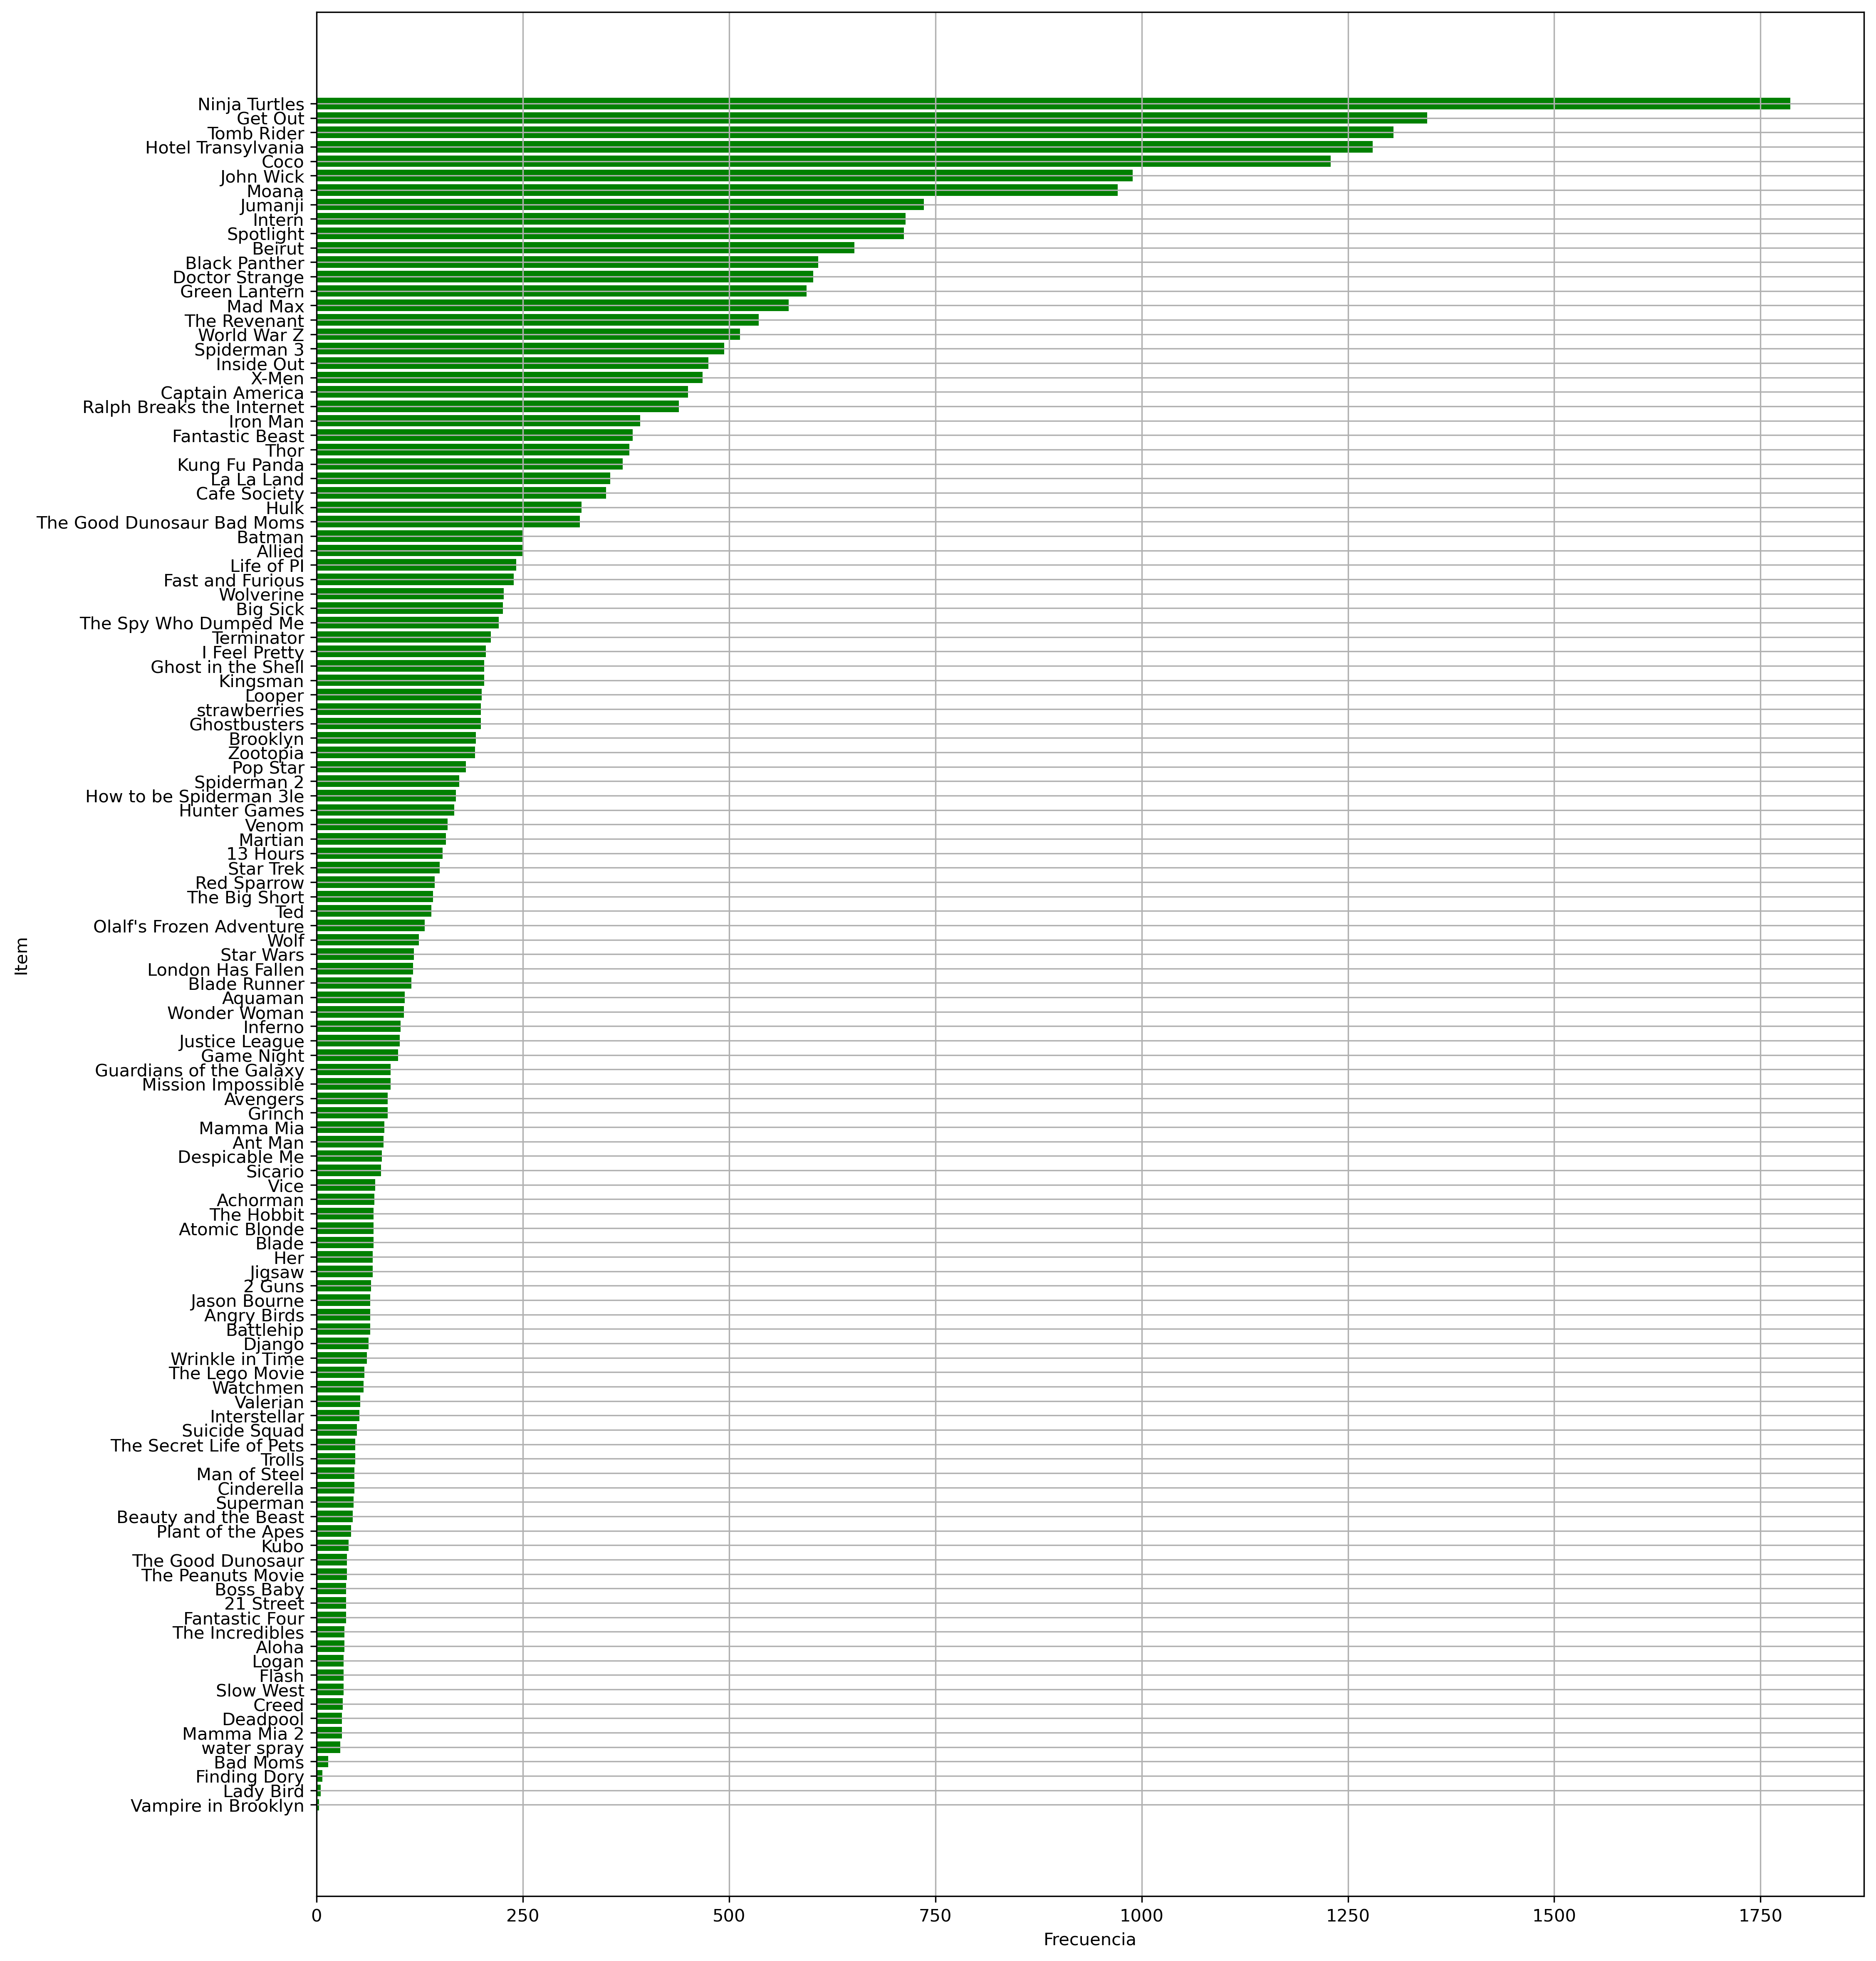

In [57]:
#Se grafica 
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(Lista['Item'], width=Lista['Frecuencia'], color='green')
plt.grid()
plt.show()

**Preparación de los datos**

La función Apriori de Python requiere que el conjunto de datos tenga la forma de una **lista de listas**, donde cada transacción es una lista interna dentro de una gran lista. 

Los datos actuales están en un dataframe de Pandas, por lo que, se requiere convertir en una lista.


In [81]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
MoviesLista = DatosMovies.stack().groupby(level=0).apply(list).tolist()
print (len(MoviesLista))
print (MoviesLista)


7460
[['The Revenant', '13 Hours', 'Allied', 'Zootopia', 'Jigsaw', 'Achorman', 'Grinch', 'Fast and Furious', 'Ghostbusters', 'Wolverine', 'Mad Max', 'John Wick', 'La La Land', 'The Good Dunosaur', 'Ninja Turtles', 'The Good Dunosaur Bad Moms', '2 Guns', 'Inside Out', 'Valerian', 'Spiderman 3'], ['Beirut', 'Martian', 'Get Out'], ['Deadpool'], ['X-Men', 'Allied'], ['Ninja Turtles', 'Moana', 'Ghost in the Shell', 'Ralph Breaks the Internet', 'John Wick'], ['Mad Max'], ['The Spy Who Dumped Me', 'Hotel Transylvania'], ['Thor', 'London Has Fallen', 'The Lego Movie'], ['Intern', 'Tomb Rider', 'John Wick'], ['Hotel Transylvania'], ['Get Out', 'Suicide Squad'], ['Doctor Strange'], ['X-Men', 'Beirut', 'Ninja Turtles', 'Get Out', 'Fantastic Beast'], ['Tomb Rider', 'Cafe Society', 'Doctor Strange'], ['Ninja Turtles', 'The Good Dunosaur Bad Moms'], ['Ninja Turtles'], ['The Revenant', 'Coco', 'Captain America', 'La La Land', 'Spiderman 2', 'Fantastic Beast', 'Mad Max'], ['X-Men', 'Get Out'], ['X-Men



> ## 4) **Aplicacion del algoritmo**

**Configuración 1**

Obtener reglas para aquellas películas que se hayan rentado al menos 10 veces en un día (70 veces en una semana):

i) El soporte mínimo se calcula de 70/7460 = 0.00938 (1%).

ii) La confianza mínima para las reglas de 30%

iii) La elevación de 2.

**Observación:** Estos valores se eligen arbitrariamente, por lo que, se recomienda probar valores y analizar la diferencia en las reglas.

In [87]:
ReglasC1 = apriori(MoviesLista, # lista creada en la celda pasada
                   min_support=0.01,  #Minimo soporte
                   min_confidence=0.3, #Minima confianza
                   min_lift=2) #Elevacion

Se recuperan las reglas obtenidas con el algoritmo.

In [88]:
ResultadosC1 = list(ReglasC1)
print (len(ResultadosC1))

9


In [90]:
ResultadosC1

[RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)]),
 RelationRecord(items=frozenset({'Jumanji', 'Tomb Rider'}), support=0.03941018766756032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.3994565217391304, lift=2.283483258370814)]),
 RelationRecord(items=frozenset({'Thor', 'Moana'}), support=0.015281501340482574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.3109217437617016)]),
 RelationRecord(items=frozenset({'Terminator', 'Tomb Rider'}), support=0.01032171581769437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Terminator'}), items_add=frozenset({'Tomb Rider'}), confidence=0.36492890995260663, lift

In [ ]:
print(ResultadosC1[0])

RelationRecord(items=frozenset({'Kung Fu Panda', 'Jumanji'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)])


La primera regla contiene dos elementos: **'Kung Fu Panda'** y **'Jumanji'** que se vieron juntos.

* Esto tiene sentido, las personas que ven películas familiares, en este caso de corte infantil, suelen ver también más películas del mismo tipo, como Kung Fu Panda (2016) y Jumanji (2017).

* El soporte es de 0.016 (1.6%), la confianza de 0.32 (32%) y elevación de 3.27, esto representa que existe 3 veces más posibilidades de que los que vean Kung Fu Panda miren también Jumanji, o viceversa.

In [91]:
for item in ResultadosC1:
  
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))
 
  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
 
  print("Lift: " + str(item[2][0][3])) 

  print("=====================================") 



Regla: frozenset({'Jumanji', 'Kung Fu Panda'})
Soporte: 0.0160857908847185
Confianza: 0.3234501347708895
Lift: 3.2784483768897226
Regla: frozenset({'Jumanji', 'Tomb Rider'})
Soporte: 0.03941018766756032
Confianza: 0.3994565217391304
Lift: 2.283483258370814
Regla: frozenset({'Thor', 'Moana'})
Soporte: 0.015281501340482574
Confianza: 0.3007915567282322
Lift: 2.3109217437617016
Regla: frozenset({'Terminator', 'Tomb Rider'})
Soporte: 0.01032171581769437
Confianza: 0.36492890995260663
Lift: 2.0861070254762035
Regla: frozenset({'Jumanji', 'Get Out', 'Ninja Turtles'})
Soporte: 0.010187667560321715
Confianza: 0.5066666666666666
Lift: 2.1163120567375886
Regla: frozenset({'Moana', 'Ninja Turtles', 'Intern'})
Soporte: 0.011126005361930294
Confianza: 0.30970149253731344
Lift: 2.37937500960696
Regla: frozenset({'Jumanji', 'Ninja Turtles', 'Moana'})
Soporte: 0.011126005361930294
Confianza: 0.5030303030303029
Lift: 2.1011232142251175
Regla: frozenset({'Jumanji', 'Tomb Rider', 'Ninja Turtles'})
Soport

**Visulización de las reglas obtneidas de la configuración 1**

In [92]:
listaR = []
for item in ResultadosC1:
 listaI = []
 listaI.append((item[0]))
 listaI.append(np.round(item[1],  decimals =4))
 listaI.append(np.round((item[2][0][2]), decimals = 4))
 listaI.append(np.round((item[2][0][3]), decimals = 4))
 listaR.append(listaI)
R1 = pd.DataFrame(listaR)
R1 = R1.rename(columns={0: 'Regla',1:'Soporte',2:'Confianza',3:'Lift'},)
R1



,Regla,Soporte,Confianza,Lift
0,"(Jumanji, Kung Fu Panda)",0.0161,0.3235,3.2784
1,"(Jumanji, Tomb Rider)",0.0394,0.3995,2.2835
2,"(Thor, Moana)",0.0153,0.3008,2.3109
3,"(Terminator, Tomb Rider)",0.0103,0.3649,2.0861
4,"(Jumanji, Get Out, Ninja Turtles)",0.0102,0.5067,2.1163
5,"(Moana, Ninja Turtles, Intern)",0.0111,0.3097,2.3794
6,"(Jumanji, Ninja Turtles, Moana)",0.0111,0.5030,2.1011
7,"(Jumanji, Tomb Rider, Ninja Turtles)",0.0172,0.4169,2.3834
8,"(Tomb Rider, Spiderman 3, Ninja Turtles)",0.0103,0.3720,2.1264


**Configuración 2**




Obtener reglas para aquellas películas que se hayan visto al menos 210 veces a la semana (30 por día):

i) El soporte mínimo se calcula de 210/7460 = 0.028 (2.8%).

ii) La confianza mínima para las reglas de 30%.

iii) La elevación mayor a 1.

In [93]:
ReglasC2 = apriori(MoviesLista, # lista creada en la celda pasada
                   min_support=0.028 ,  #Minimo soporte
                   min_confidence=0.3, #Minima confianza
                   min_lift=1) #Elevacion
ResultadosC2 = list(ReglasC2)
ResultadosC2

[RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)]),
 RelationRecord(items=frozenset({'Coco', 'Ninja Turtles'}), support=0.05294906166219839, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3435570178478284)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Intern'}), support=0.035924932975871314, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3753501400560224, lift=1.5678118951948081)]),
 RelationRecord(items=frozenset({'Jumanji', 'Ninja Turtles'}), support=0.04115281501340483, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.4171195652173

In [94]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)])


>La primera regla contiene dos elementos: 'Beirut' y 'Get Out' que se vieron juntos.

Esto también tiene sentido, las personas que ven películas de espionaje, como Beirut (2018), podrían tener
gustos afines con películas de terror, como Get Out (2017).

El soporte es de 0.028 (2.8%), la confianza de 0.33 (33%) y una elevación de 1.83, esto representa que existe
casi 2 veces más probabilidades de que los que vean Beirut miren también Get Out, o viceversa.

In [95]:
listaR2 = []
for item in ResultadosC2:
 listaI = []
 listaI.append((item[0]))
 listaI.append(np.round(item[1],  decimals =4))
 listaI.append(np.round((item[2][0][2]), decimals = 4))
 listaI.append(np.round((item[2][0][3]), decimals = 4))
 listaR2.append(listaI)


In [96]:
R2 = pd.DataFrame(listaR2)
R2 = R2.rename(columns={0: 'Regla',1:'Soporte',2:'Confianza',3:'Lift'},)
R2

,Regla,Soporte,Confianza,Lift
0,"(Beirut, Get Out)",0.0290,0.3313,1.8361
1,"(Coco, Ninja Turtles)",0.0529,0.3217,1.3436
2,"(Ninja Turtles, Intern)",0.0359,0.3754,1.5678
3,"(Jumanji, Ninja Turtles)",0.0412,0.4171,1.7423
4,"(Jumanji, Tomb Rider)",0.0394,0.3995,2.2835
5,"(Ninja Turtles, Moana)",0.0483,0.3708,1.5486
6,"(Spotlight, Ninja Turtles)",0.0339,0.3553,1.4842
7,"(Tomb Rider, Ninja Turtles)",0.0601,0.3433,1.4339
